In [126]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [127]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [175]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf 
yf.pdr_override()
import pandas_datareader.data as pdr


In [176]:
#import data
def get_data(stocks,start,end):
    stockData=pdr.get_data_yahoo(stocks,start,end)
    stockData=stockData['Close']
    returns=stockData.pct_change()
    meanReturns=returns.mean()
    covMatrix=returns.cov()
    return meanReturns,covMatrix

In [177]:
stockList=['CBA','BHP','TLS','NAB','STO']
stocks=[stock + '.AX' for stock in stockList]
print (stocks)

['CBA.AX', 'BHP.AX', 'TLS.AX', 'NAB.AX', 'STO.AX']


In [178]:
endDate=dt.datetime.now()
startDate=endDate - dt.timedelta(days=300)

In [179]:
meanReturns,covMatrix=get_data(stocks,startDate,endDate)
print(meanReturns)
print(covMatrix)

[*********************100%%**********************]  5 of 5 completed

Ticker
BHP.AX   -0.000148
CBA.AX    0.000591
NAB.AX    0.001203
STO.AX    0.000155
TLS.AX   -0.000791
dtype: float64
Ticker    BHP.AX    CBA.AX    NAB.AX    STO.AX    TLS.AX
Ticker                                                  
BHP.AX  0.000166  0.000050  0.000035  0.000045  0.000016
CBA.AX  0.000050  0.000092  0.000070  0.000019  0.000024
NAB.AX  0.000035  0.000070  0.000097  0.000014  0.000027
STO.AX  0.000045  0.000019  0.000014  0.000184  0.000013
TLS.AX  0.000016  0.000024  0.000027  0.000013  0.000072


In [180]:
weights=np.random.random(len(meanReturns))
weights/=np.sum(weights)
print(weights)


[0.06234033 0.12409691 0.3840975  0.302573   0.12689226]


In [181]:
#Monte Carlo Method
#number of simulations
mc_sims=100
T=100 #timeframe in days 
meanM=np.full(shape=(T,len(weights)),fill_value=meanReturns)
meanM=meanM.T
portfolio_sims=np.full(shape=(T,mc_sims),fill_value=0.0)

Text(0.5, 1.0, 'MC Simulation of a portfolio')

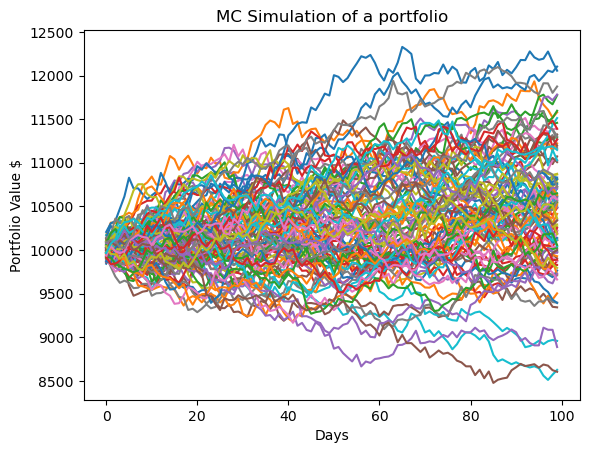

In [182]:
initialPortfolio=10000
for m in range(0,mc_sims):
    #MCvlopps
    Z=np.random.normal(size=(T,len(weights)))
    L=np.linalg.cholesky(covMatrix)
    dailyReturns=meanM+ np.inner(L,Z)
    portfolio_sims[:,m]=np.cumprod(np.inner(weights,dailyReturns.T)+1)*initialPortfolio
    
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value $')
plt.xlabel('Days')
plt.title('MC Simulation of a portfolio')


In [150]:
#VaR and CVaR with Monte Carlo Method


In [230]:
#input: pandas series of returns
#output: percentile on return distribution to a given confidence level alpha
def mcVaR(returns,alpha=5):

    if isinstance(returns,pd.Series):
        return np.percentile(returns,alpha)
    else:
        raise TypeError('Expected a pandas data series')

In [238]:
#expected shortfall below that percentile
#input: pandas series of returns
#output: CVar or Expected Shortfall to a given confidence level
def mcCVaR(returns,alpha=5):

    if isinstance(returns,pd.Series):
        return returns[returns<=mcVaR(returns,alpha=5)].mean()
    else:
        raise TypeError('Expected a pandas data series')

In [246]:
portfolioResults=pd.Series(portfolio_sims[-1,:])
VaR=initialPortfolio - mcVaR(portfolioResults,alpha=5)
CVaR=initialPortfolio - mcCVaR(portfolioResults,alpha=5)
print('VaR ${}'.format(round(VaR,2)))
print('CVaR ${}'.format(round(CVaR,2)))

VaR $609.72
CVaR $1116.43
